In [1]:
!ls

dataset  instance_type.png  quick_start_pytorch.ipynb


In [2]:
%cd /storage/

/storage


In [3]:
%ls

mtsamples_dataset/


In [4]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [5]:
%conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

## Data Reading and validating

In [7]:
# read the data
transcriptions = pd.read_csv('mtsamples_dataset/mtsamples.csv')
transcriptions.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:
# drop the first column as it does not have any relevant information
transcriptions.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# check the data again
transcriptions.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [10]:
# filter data with the columns of interest
filtered_data = transcriptions[['medical_specialty', 'transcription']]
filtered_data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
porter = PorterStemmer()

In [14]:
# Preprocess
def preprocess(text, lower=True, stem=False,
                filters="[!\"'#$%&()*\+,-.:;<=>?@\\\[\]^_`{|}~]",
                stopwords=STOPWORDS):
    # lower the text
    if lower:
        text = text.lower()
    
    # remove the stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub(filters, r"", text)
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    # Remove links
    text = re.sub(r"http\S+", "", text)

    # Stemming
    if stem:
        text = " ".join([porter.stem(word) for word in text.split(" ")])

    return text

In [15]:
%pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [16]:
import ipywidgets as widgets

In [17]:
# Toggle preprocessing parameters
@widgets.interact(lower=True, stem=False)
def display_preprocessed_text(lower, stem):
    text = "SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,Lungs:  Clear.,ASSESSMENT:,  Allergic rhinitis.,PLAN:,1.  She will try Zyrtec instead of Allegra again.  Another option will be to use loratadine.  She does not think she has prescription coverage so that might be cheaper.,2.  Samples of Nasonex two sprays in each nostril given for three weeks.  A prescription was written as well."
    preprocessed_text = preprocess(text=text, lower=lower, stem=stem)
    print(text)
    print (preprocessed_text)

interactive(children=(Checkbox(value=True, description='lower'), Checkbox(value=False, description='stem'), Ou…

In [18]:
# display_preprocessed_text(True, False)

In [19]:
df = filtered_data.copy()

In [20]:
# check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
medical_specialty,medical_specialty,0.000000
transcription,transcription,0.660132


In [21]:
# drop the null values
print(f"Length of dataset before dropping null values: {len(df)}")
df = df.dropna()
print(f"Length of dataset after dropping null values: {len(df)}")

Length of dataset before dropping null values: 4999
Length of dataset after dropping null values: 4966


In [22]:
# # First let's check how blood pressure word is being written over the dataset
# blood_pressure_texts = df[df['transcription'].str.contains('blood pressure')]
# print(len(blood_pressure_texts))

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
# bp_subtexts = [re.findall(r"blood pressure [\w\W]{0,20}", text) for text in blood_pressure_texts['transcription'].values.tolist()]
# print(bp_subtexts)

In [25]:
original_df = df.copy()

In [26]:
# preprocess the columns
df.transcription = df.transcription.apply(preprocess,lower=True, stem=False)
print (f"{original_df.transcription.values[0]}\n{df.transcription.values[0]}")

SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,L

In [27]:
df.medical_specialty = df.medical_specialty.apply(preprocess,lower=True, stem=False)
print (f"{original_df.medical_specialty.values[0]}\n{df.medical_specialty.values[0]}")

 Allergy / Immunology
allergy / immunology


## Exploratory Data Analysis

### 1. Number of unique medical specialty in the data

In [28]:
unique_specialty = df['medical_specialty'].unique()
print(f"Number of unique medical specialty are: {len(unique_specialty)}")

Number of unique medical specialty are: 40


### 2. What is the distribution of each medical specialty?

In [29]:
from collections import Counter

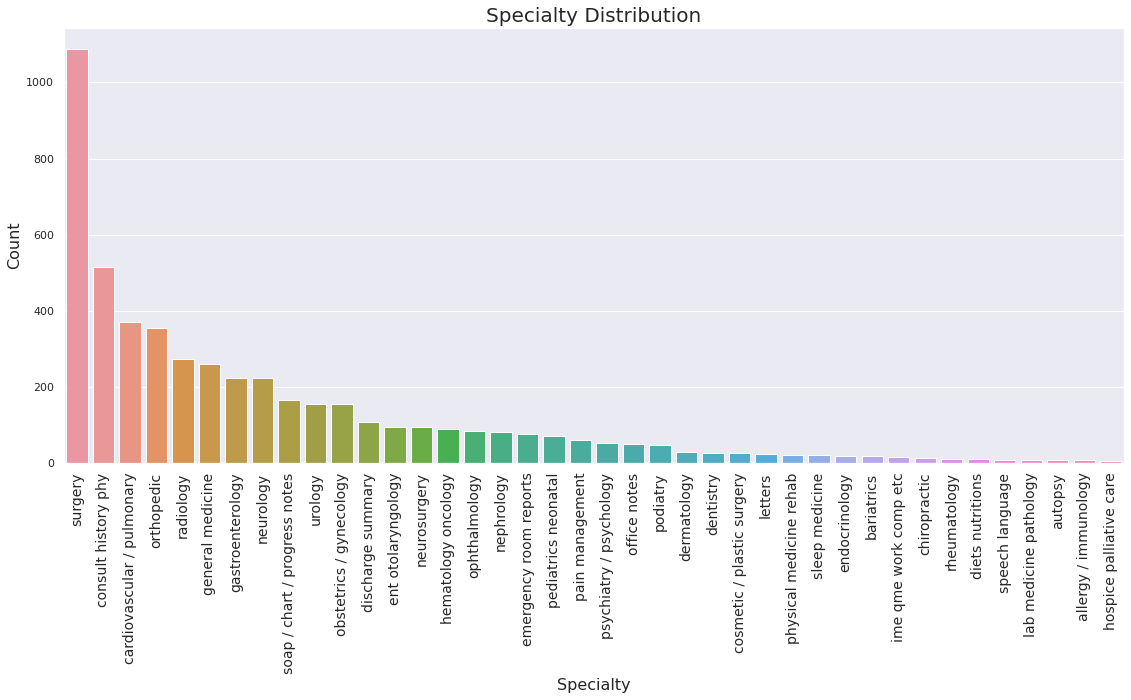

In [30]:
specialties, specialty_count = zip(*Counter(df['medical_specialty'].values).most_common())
plt.figure(figsize=(19,8))
ax = sns.barplot(list(specialties), list(specialty_count))
plt.title("Specialty Distribution", fontsize=20)
plt.xlabel("Specialty", fontsize=16)
plt.ylabel("Count", fontsize=16)
ax.set_xticklabels(specialties, rotation=90, fontsize=14)
plt.show()

In [31]:
# show the top 5 specialties with highest number of transcriptions
print(specialties[:5])

('surgery', 'consult history phy', 'cardiovascular / pulmonary', 'orthopedic', 'radiology')


### 3. What are most used word in each specialty?

In [32]:
# %conda install -c conda-forge wordcloud

In [33]:
@widgets.interact(specialty=list(specialties))
def display_word_cloud(specialty="surgery"):
    plt.figure(figsize=(15, 8))
    subset = df[df.medical_specialty==specialty]
    text = subset.transcription.values
    cloud = WordCloud(
        stopwords=STOPWORDS,
        background_color="white",
        collocations=False,
        width=500, height=100,
    ).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)

interactive(children=(Dropdown(description='specialty', options=('surgery', 'consult history phy', 'cardiovasc…

### 4. Is there similarity between any two medical specialty?

In [34]:
%conda install -c conda-forge spacy
%conda install -c conda-forge cupy


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
import spacy

In [36]:
%pip install scispacy
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 15.9 MB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
import scispacy

In [38]:
nlp = spacy.load("en_core_sci_sm")

In [42]:
@widgets.interact(specialty_1=list(specialties), specialty_2=list(specialties))
def specialty_similarity(specialty_1="surgery", specialty_2="radiology"):
    specialty_1_text = df[df.medical_specialty==specialty_1].transcription.values.tolist()
    specialty_2_text = df[df.medical_specialty==specialty_2].transcription.values.tolist()

    specialty_1_string = " ".join(specialty_1_text)[:1000000]
    specialty_2_string = " ".join(specialty_2_text)[:1000000]
    doc1 = nlp(specialty_1_string)
    doc2 = nlp(specialty_2_string)

    print(f"Similarity between {specialty_1} and {specialty_2} are: {doc1.similarity(doc2)}")

interactive(children=(Dropdown(description='specialty_1', options=('surgery', 'consult history phy', 'cardiova…